In [12]:
import sys
import tensorflow as tf
import cv2

print("¡Todo está funcionando correctamente!")
print(f"Versión de Python: {sys.version}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Versión de OpenCV: {cv2.__version__}")

¡Todo está funcionando correctamente!
Versión de Python: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Versión de TensorFlow: 2.20.0
Versión de OpenCV: 4.12.0


In [13]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn import metrics
import os
%matplotlib inline

# Configurar grupos y conjuntos
groups = ['COVID-19', 'Normal', 'Non-COVID']
sets = ['Val', 'Test', 'Train']

# Rutas base
base_path = 'Data/Lung Segmentation Data/Lung Segmentation Data'
destination_path = 'Processed_Data/COVID-EX-Qu-dataset'
destination_path_masked = 'Processed_Data/COVID-EX-Qu-dataset_MASKED'

# Función para crear estructura de directorios
def create_directory_structure():
    """Crea la estructura de directorios necesaria para los datos procesados."""
    for set_name in sets:
        for group in groups:
            os.makedirs(os.path.join(destination_path, set_name, group), exist_ok=True)
            os.makedirs(os.path.join(destination_path_masked, set_name, group), exist_ok=True)

# Función para explorar el dataset
def explore_dataset():
    """Explora la estructura del dataset y muestra estadísticas básicas."""
    print("Explorando el dataset...")
    for set_name in sets:
        print(f"\nConjunto: {set_name}")
        for group in groups:
            img_dir = os.path.join(base_path, set_name, group)
            mask_dir = os.path.join(base_path, set_name, group, 'lung masks')
            
            # Contar imágenes y máscaras
            try:
                num_images = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                num_masks = len([f for f in os.listdir(mask_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) if os.path.exists(mask_dir) else 0
                print(f"  {group}: {num_images} imágenes, {num_masks} máscaras")
            except FileNotFoundError:
                print(f"  {group}: No encontrado")

# Crear directorios de destino
create_directory_structure()

# Explorar el dataset
explore_dataset()




Explorando el dataset...

Conjunto: Val
  COVID-19: 0 imágenes, 1903 máscaras
  Normal: 0 imágenes, 1712 máscaras
  Non-COVID: 0 imágenes, 1802 máscaras

Conjunto: Test
  COVID-19: 0 imágenes, 2395 máscaras
  Normal: 0 imágenes, 2140 máscaras
  Non-COVID: 0 imágenes, 2253 máscaras

Conjunto: Train
  COVID-19: 0 imágenes, 7658 máscaras
  Normal: 0 imágenes, 6849 máscaras
  Non-COVID: 0 imágenes, 7208 máscaras


Explorando el dataset...

Conjunto: Val
  COVID-19: 1903 imágenes, 1903 máscaras
  Normal: 1712 imágenes, 1712 máscaras
  Non-COVID: 1802 imágenes, 1802 máscaras

Conjunto: Test
  COVID-19: 2395 imágenes, 2395 máscaras
  Normal: 2140 imágenes, 2140 máscaras
  Non-COVID: 2253 imágenes, 2253 máscaras

Conjunto: Train
  COVID-19: 7658 imágenes, 7658 máscaras
  Normal: 6849 imágenes, 6849 máscaras
  Non-COVID: 7208 imágenes, 7208 máscaras


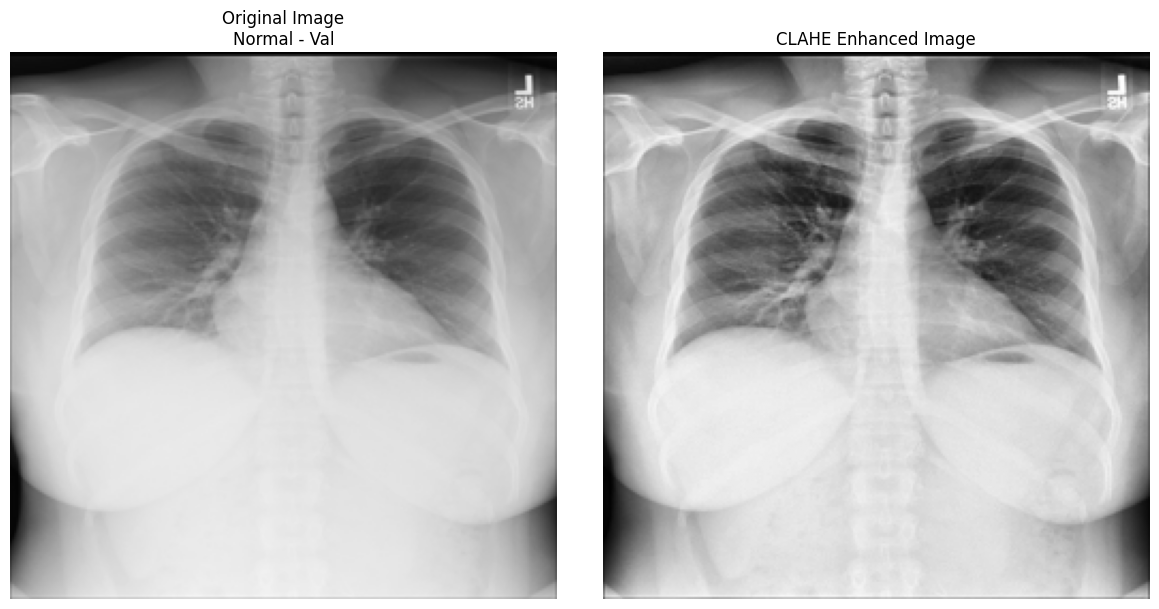

In [14]:
def explore_dataset():
    """Explora la estructura del dataset y muestra estadísticas básicas."""
    print("Explorando el dataset...")
    for set_name in sets:
        print(f"\nConjunto: {set_name}")
        for group in groups:
            img_dir = os.path.join(base_path, set_name, group, 'images')
            mask_dir = os.path.join(base_path, set_name, group, 'lung masks')
            
            # Contar imágenes y máscaras
            try:
                num_images = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) if os.path.exists(img_dir) else 0
                num_masks = len([f for f in os.listdir(mask_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) if os.path.exists(mask_dir) else 0
                print(f"  {group}: {num_images} imágenes, {num_masks} máscaras")
            except Exception as e:
                print(f"  {group}: Error - {str(e)}")

# Actualizar también la función preprocessing_viz
def preprocessing_viz():
    # Visual test of the future preprocessing:
    # Evaluation of the CLAHE performance

    # Seleccionar un conjunto y grupo aleatorio
    sett = random.choice(sets)
    group = random.choice(groups)
    
    # Ruta a las imágenes originales
    img_dir = os.path.join(base_path, sett, group, 'images')
    
    # Obtener lista de imágenes
    try:
        files = [f for f in os.listdir(img_dir) 
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if not files:
            print(f"No se encontraron imágenes en {img_dir}")
            return
        
        # Seleccionar una imagen aleatoria
        random_file = random.choice(files)
        image_path = os.path.join(img_dir, random_file)

        # Leer la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"No se pudo cargar la imagen: {image_path}")
            return

        # Convertir a escala de grises
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Inicializar y aplicar CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_image = clahe.apply(gray_image)
        
        # Crear figura
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Mostrar imagen original
        axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[0].set_title(f'Original Image\n{group} - {sett}')
        axes[0].axis('off')

        # Mostrar imagen con CLAHE
        axes[1].imshow(clahe_image, cmap='gray')
        axes[1].set_title('CLAHE Enhanced Image')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error al procesar la imagen: {str(e)}")

# Volver a ejecutar la exploración
explore_dataset()

# Probar la visualización
preprocessing_viz()

Found 43430 images belonging to 3 classes.
Found 10834 images belonging to 3 classes.
Found 13576 images belonging to 3 classes.
Clases encontradas: {'COVID-19': 0, 'Non-COVID': 1, 'Normal': 2}

Visualizando batch de entrenamiento:


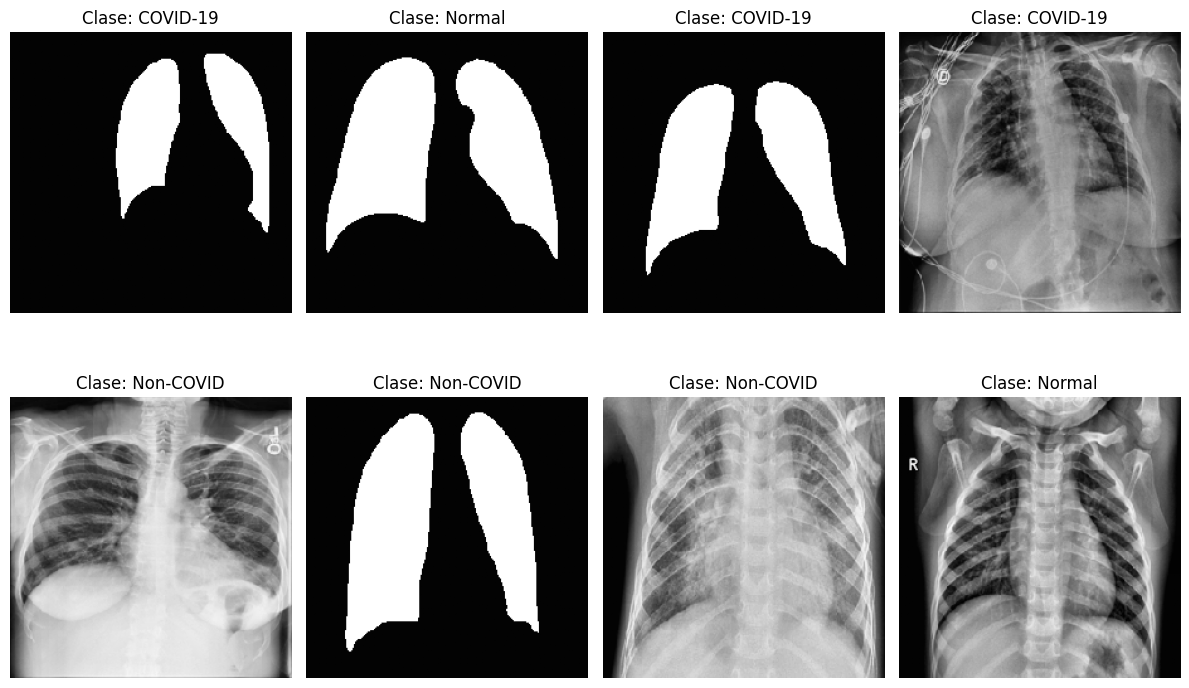

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

def preprocess_image(img):
    """
    Preprocesa la imagen aplicando CLAHE y normalización.
    
    Args:
        img: Imagen de entrada (BGR o escala de grises)
    
    Returns:
        Imagen preprocesada en RGB con valores normalizados [0, 1]
    """
    # Convertir a escala de grises si es RGB
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Asegurar que la imagen sea de tipo uint8 para CLAHE
    img = img.astype('uint8')
    
    # Aplicar CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img)
    
    # Convertir de nuevo a RGB (repetir el canal 3 veces)
    img_rgb = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2RGB)
    
    # Normalizar a [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0
    
    return img_normalized

# Configuración del generador de datos
batch_size = 32
target_size = (224, 224)  # Tamaño objetivo para redimensionar

# Crear generadores de datos
def create_data_generator(data_dir, batch_size=32, shuffle=True, subset=None):
    return ImageDataGenerator(
        preprocessing_function=preprocess_image,
        validation_split=0.2 if subset == 'validation' else None
    ).flow_from_directory(
        directory=data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=shuffle,
        subset=subset
    )

# Crear generadores para entrenamiento, validación y prueba
train_generator = create_data_generator(
    os.path.join(base_path, 'Train'),
    batch_size=batch_size,
    shuffle=True
)

val_generator = create_data_generator(
    os.path.join(base_path, 'Val'),
    batch_size=batch_size,
    shuffle=False
)

test_generator = create_data_generator(
    os.path.join(base_path, 'Test'),
    batch_size=batch_size,
    shuffle=False
)

# Verificar las clases
print("Clases encontradas:", train_generator.class_indices)

# Visualizar un batch de imágenes preprocesadas
def visualize_batch(generator):
    # Obtener un batch de imágenes
    x_batch, y_batch = next(generator)
    
    # Configurar la figura
    plt.figure(figsize=(12, 8))
    
    # Mostrar las primeras 8 imágenes del batch
    for i in range(min(8, len(x_batch))):
        plt.subplot(2, 4, i+1)
        plt.imshow(x_batch[i])
        plt.title(f"Clase: {list(generator.class_indices.keys())[np.argmax(y_batch[i])]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualizar un batch de entrenamiento
print("\nVisualizando batch de entrenamiento:")
visualize_batch(train_generator)

In [16]:
import os
from pathlib import Path

# Ruta base de las máscaras de COVID-19
covid_mask_path = Path('Data/Infection Segmentation Data/Infection Segmentation Data')

# Contar máscaras de COVID-19
covid_mask_count = 0

# Recorrer los conjuntos (Train, Val, Test)
for split in ['Train', 'Val', 'Test']:
    covid_dir = covid_mask_path / split / 'COVID-19' / 'infection masks'
    if covid_dir.exists():
        covid_mask_count += len(list(covid_dir.glob('*.png')))

print(f"Número total de máscaras de infección de COVID-19: {covid_mask_count}")

# Opcional: Mostrar el conteo por conjunto
print("\nConteo por conjunto:")
for split in ['Train', 'Val', 'Test']:
    split_dir = covid_mask_path / split / 'COVID-19' / 'infection masks'
    if split_dir.exists():
        count = len(list(split_dir.glob('*.png')))
        print(f"- {split}: {count} máscaras")
    else:
        print(f"- {split}: Directorio no encontrado")

Número total de máscaras de infección de COVID-19: 2913

Conteo por conjunto:
- Train: 1864 máscaras
- Val: 466 máscaras
- Test: 583 máscaras
